<a href="https://colab.research.google.com/github/samanthajmichael/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install umap-learn
!pip install bertopic

# Load Data

In [ ]:
import pandas as pd

# import csv
data_url = "https://raw.githubusercontent.com/sultanawar321/reviews_text_classification/main/data/reviews.csv"

df = pd.read_csv(data_url)
df.head()

Unnamed: 0  OverallRating                              ReviewHeader  \
0           0            1.0    "Service level far worse then Ryanair"   
1           1            3.0  "do not upgrade members based on status"   
2           2            8.0             "Flight was smooth and quick"   
3           3            1.0             "Absolutely hopeless airline"   
4           4            1.0        "Customer Service is non existent"   

               Name            Datetime  VerifiedReview  \
0           L Keele  19th November 2023            True   
1      Austin Jones  19th November 2023            True   
2        M A Collie  16th November 2023           False   
3        Nigel Dean  16th November 2023            True   
4  Gaylynne Simpson  14th November 2023           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on British Airways from...        Business   
2  Boarded on time, but it took ages to get to th...  Couple Leisure   
3  5 days before the flight, we were advised by B...  Couple Leisure   
4  We traveled to Lisbon for our dream vacation, ...  Couple Leisure   

         SeatType                      Route      DateFlown  SeatComfort  \
0   Economy Class        London to Stuttgart  November 2023          1.0   
1   Economy Class         Brussels to London  November 2023          2.0   
2  Business Class  London Heathrow to Dublin  November 2023          3.0   
3   Economy Class           London to Dublin  December 2022          3.0   
4   Economy Class           London to Lisbon  November 2023          1.0   

   CabinStaffService  GroundService  ValueForMoney Recommended Aircraft  \
0                1.0            1.0            1.0          no      NaN   
1                3.0            1.0            2.0          no     A320   
2                3.0            4.0            3.0         yes     A320   
3                3.0            1.0            1.0          no      NaN   
4                1.0            1.0            1.0          no      NaN   

   Food&Beverages  InflightEntertainment  Wifi&Connectivity  
0             NaN                    NaN                NaN  
1             1.0                    2.0                2.0  
2             4.0                    NaN                NaN  
3             NaN                    NaN                NaN  
4             1.0                    1.0                1.0

In [ ]:
# let's keep only the raw text
docs = [_ for _ in df['ReviewBody']]

len(docs)

3701

In [ ]:
docs[0]

'4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.'

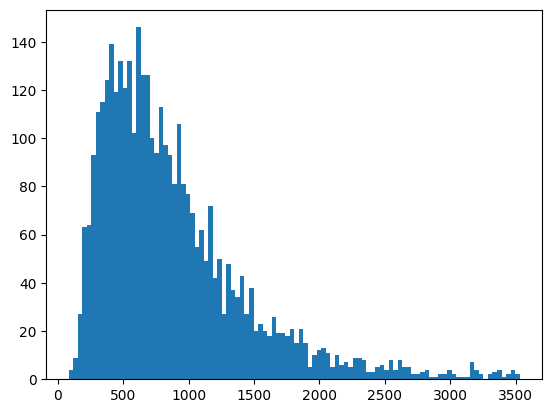

In [ ]:
# matplotlib bar chart of length of each string in docs list
import matplotlib.pyplot as plt

plt.hist([len(doc) for doc in docs], bins=100)
plt.show()

## scikit-learn pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

import umap

# Create a TF-IDF pipeline
tfidf_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("svd", TruncatedSVD(n_components=50, random_state=42)),
    ("umap", umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42))
])

# Fit the pipeline to the text data
tfidf_pipeline.fit(docs)

# Transform the text data into the UMAP representation
umap_representations = tfidf_pipeline.transform(docs)

## TF-IDF

In [ ]:
# Get the TF-IDF vectorizer from the pipeline
tfidf_vectorizer = tfidf_pipeline.named_steps["tfidf"]

# Get the vocabulary from the TF-IDF vectorizer
vocabulary = tfidf_vectorizer.vocabulary_

doc_idx = 0
print(docs[doc_idx])

4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.


In [ ]:
# Get the TF-IDF weights
tfidf_weights = tfidf_vectorizer.transform(docs)

# Get for sample document
print(tfidf_weights[0])

  (0, 13593)	0.11038903006137421
  (0, 13294)	0.09978501096455733
  (0, 12755)	0.18336787753615508
  (0, 12644)	0.20856724243628605
  (0, 12600)	0.08788095383469802
  (0, 12492)	0.08118240135302536
  (0, 12411)	0.04950874873320211
  (0, 12317)	0.13478834307992857
  (0, 12140)	0.13956966382341154
  (0, 12027)	0.13478834307992857
  (0, 11688)	0.16555961103228256
  (0, 11328)	0.10928778014898512
  (0, 10985)	0.04446177847407503
  (0, 10663)	0.11233631763420109
  (0, 9991)	0.10309186923876859
  (0, 9962)	0.10893094249920988
  (0, 9951)	0.22333918273526085
  (0, 9619)	0.17518619683115655
  (0, 9570)	0.0955599929682404
  (0, 9283)	0.11511075068387766
  (0, 9282)	0.20856724243628605
  (0, 9121)	0.08286058239911631
  (0, 8838)	0.08292489256479013
  (0, 8035)	0.13478834307992857
  (0, 7784)	0.16555961103228256
  :	:
  (0, 7186)	0.06346454631291455
  (0, 6733)	0.16555961103228256
  (0, 6512)	0.06521339415185888
  (0, 6511)	0.06926554562881351
  (0, 6442)	0.09787217265995943
  (0, 6412)	0.1407648

In [ ]:
import numpy as np

# Get the words with the highest frequency in the document
top_words = np.argsort(tfidf_weights[0].toarray())[0][-1:]

# Print the top words
for word_idx in top_words:
    word = list(vocabulary.keys())[list(vocabulary.values()).index(word_idx)]
    print(word)

luggage


Top 20 words with highest average TF-IDF weights:
averaged: 0.0010
basis: 0.0010
ba11: 0.0010
appreciate: 0.0010
android: 0.0010
blurb: 0.0010
advertisement: 0.0010
brought: 0.0010
attitudes: 0.0010
15pm: 0.0009
ancient: 0.0009
anz: 0.0009
261: 0.0009
bored: 0.0009
abysmal: 0.0009
assisted: 0.0009
46: 0.0009
bicycle: 0.0009
blueberry: 0.0009
b737: 0.0009


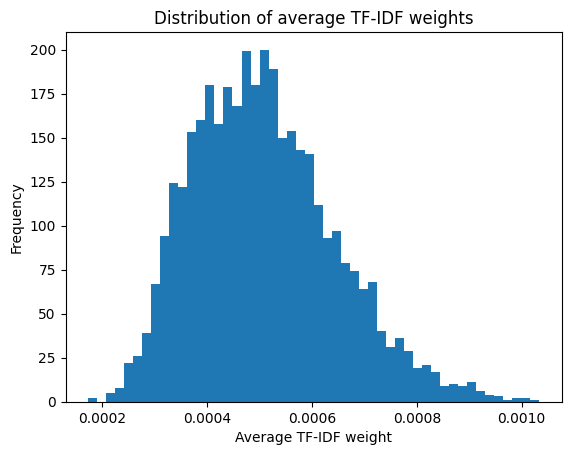

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert sparse array to dense array for easier calculation
dense_weights = tfidf_weights.toarray()

# Get the feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Explore the top 20 words with the highest average TF-IDF weights
avg_weights = np.mean(dense_weights, axis=1)
top_idx = np.argsort(-avg_weights)[:20]
print("Top 20 words with highest average TF-IDF weights:")
for idx in top_idx:
    print(f"{feature_names[idx]}: {avg_weights[idx]:.4f}")

# Explore the distribution of TF-IDF weights for all documents
plt.hist(avg_weights, bins=50)
plt.xlabel("Average TF-IDF weight")
plt.ylabel("Frequency")
plt.title("Distribution of average TF-IDF weights")
plt.show()

In [ ]:
# Find the most common words across all documents
common_words = np.argsort(-np.sum(dense_weights, axis=0))[:10]
print("Most common words across all documents:")
for idx in common_words:
    print(f"{feature_names[idx]}: {np.sum(dense_weights[:, idx]):.4f}")

Most common words across all documents:
flight: 200.9119
ba: 156.0382
service: 115.5494
seat: 110.1123
good: 107.8684
food: 104.0476
crew: 101.2628
british: 100.1412
airways: 99.5433
seats: 98.3717


See [this demo](https://pair-code.github.io/understanding-umap/) for more intuition on UMAP.

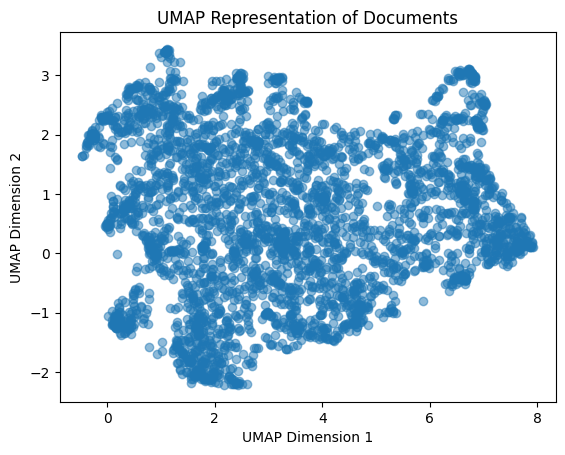

In [ ]:
import numpy as np

# Plot the UMAP representation of the documents with altair
plt.scatter(umap_representations[:, 0], umap_representations[:, 1], alpha=0.5)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Representation of Documents")
plt.show()

Let's now cluster the UMAP representation using DBSCAN.

For more details on DBSCAN, watch [this](https://youtu.be/RDZUdRSDOok?feature=shared) StatQuest video.

In [ ]:
import altair as alt
from sklearn.cluster import DBSCAN

# Run DBSCAN clustering on the UMAP representation
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(umap_representations)

df = pd.DataFrame(np.column_stack((umap_representations, dbscan_labels, docs)), columns=["x", "y", "dbscan_cats","text"])

alt.Chart(df).mark_circle().encode(
    x="x:Q",
    y="y:Q",
    color = "dbscan_cats:N",
    tooltip=["x", "y", "dbscan_cats", "text"]
).interactive()

alt.Chart(...)

In [ ]:
# view examples
from ipywidgets import interact

def get_examples(index, cat):
    return [_ for _ in df[df["dbscan_cats"] == cat].text][index]

interact(get_examples, index=(0, 18), cat="77")

interactive(children=(IntSlider(value=9, description='index', max=18), Text(value='77', description='cat'), Ou…

<function __main__.get_examples(index, cat)>

# Topic Modeling

This is just one implementation of Topic Modeling (Non-negative Matrix Factorization, a close cousin of the most popular LDA topic modeling technique).

It's important to remember that topic modeling is a task, not a model itself. There are a variety of algorithms, most of which have been replaced recently by word embedding based approaches (e.g., see [BERTopic](https://maartengr.github.io/BERTopic/index.html)).

Very important points to remember about topic modeling:

1. Running the model is the start, not the end. It requires human interpretation after running the model. Do not forgot this (#1 mistake by new data scientists)!

2. Validation is critical; don't just accept the model. It's unsupervised so you need to use knowledge to check the model.

3. Evaluation is hard and not as clear as supervised ML. There are metrics (e.g., Perplexity) but these are more theoretical and in practice hard to justify.

4. Topic modeling is all about exploration: "learning what you don't know". Very rarely are topic models into production.

In [ ]:
from sklearn.decomposition import NMF
# Run NMF topic modeling
nmf = NMF(n_components=20, random_state=42)
nmf_topics = nmf.fit_transform(tfidf_pipeline.named_steps["tfidf"].fit_transform(docs))

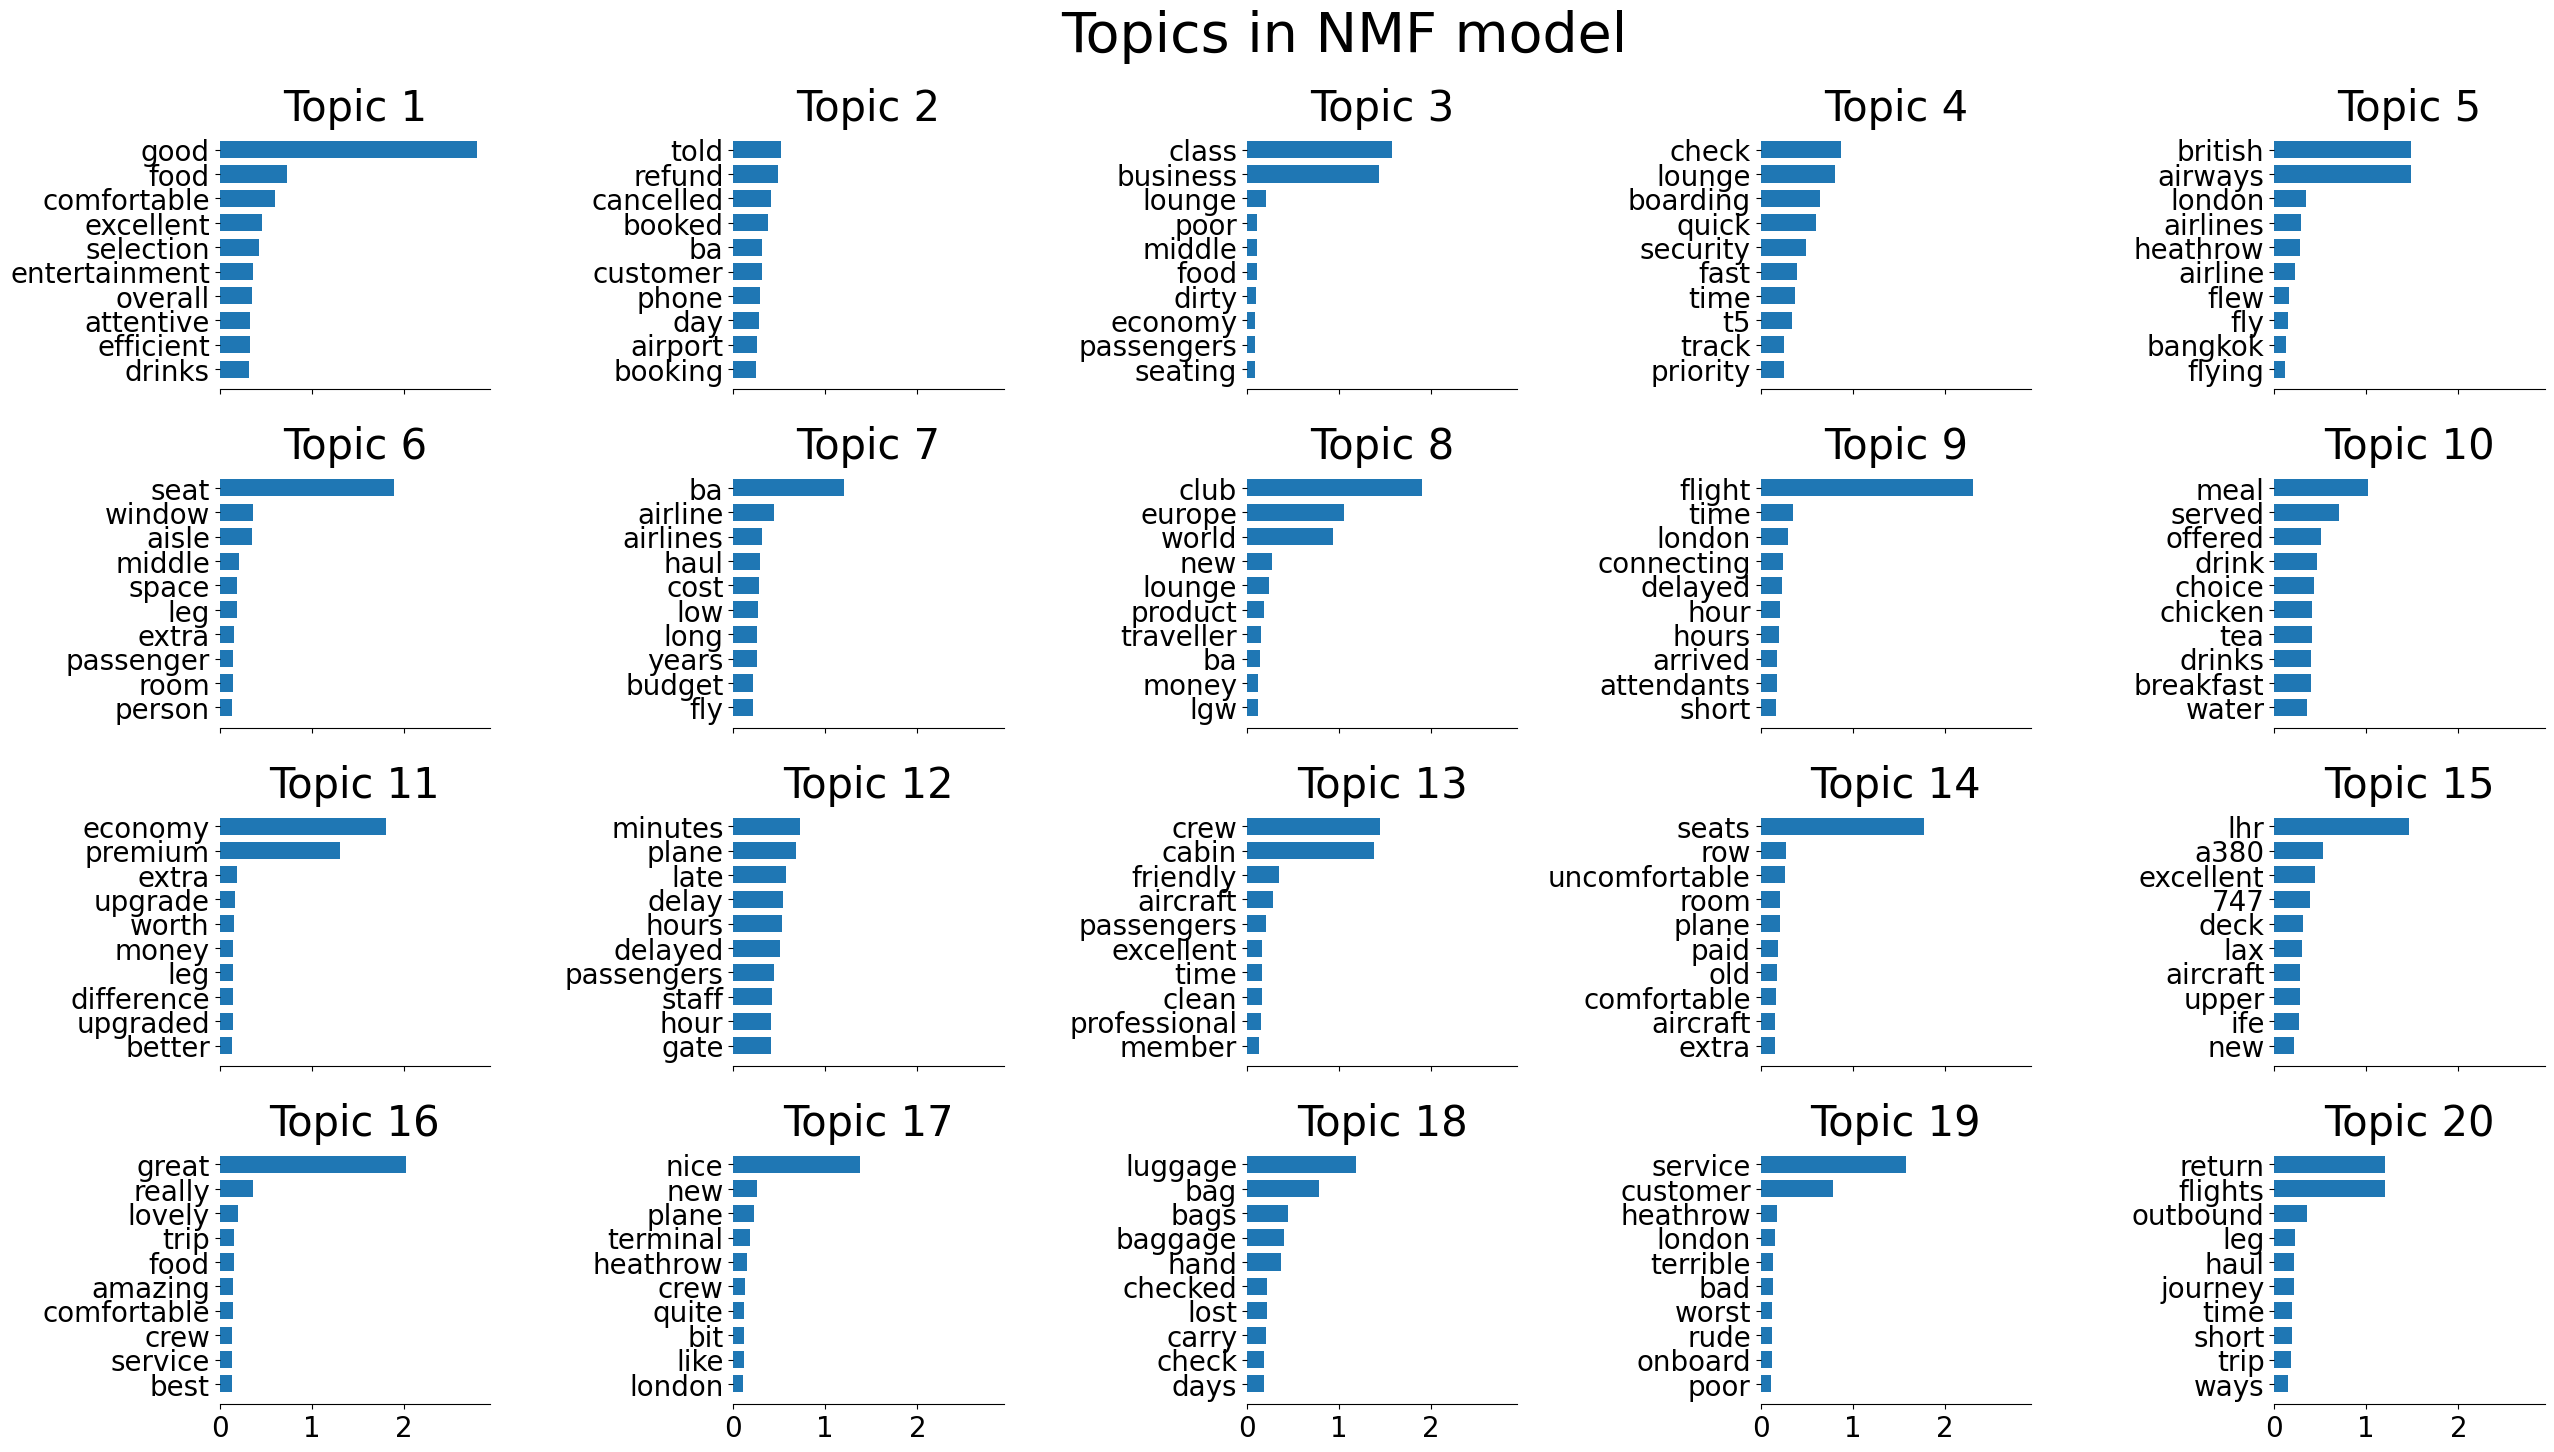

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


plot_top_words(
    nmf, tfidf_feature_names, 10, "Topics in NMF model"
)

# Lab Questions

## Questions 1

Write a Python function that uses the `similarity_matrix` and the index of a document (e.g., document 0) and returns the k-most similar documents.
- Include a 2nd optional parameter to set k, which by default should be 10.

In [ ]:
# Calculate the document similarity using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(dense_weights)
print("Document similarity matrix:")
print(similarity_matrix)

Document similarity matrix:
[[1.         0.06898817 0.01671904 ... 0.02114476 0.04885906 0.03163517]
 [0.06898817 1.         0.02465058 ... 0.04079577 0.01969868 0.04538192]
 [0.01671904 0.02465058 1.         ... 0.0135982  0.0262301  0.        ]
 ...
 [0.02114476 0.04079577 0.0135982  ... 1.         0.04469511 0.03530309]
 [0.04885906 0.01969868 0.0262301  ... 0.04469511 1.         0.00584186]
 [0.03163517 0.04538192 0.         ... 0.03530309 0.00584186 1.        ]]


In [ ]:
# find the 10 most similar documents to this document
docs[0]

'4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.'


### Answer this:

- Write a Python function/code to find what are the 10 most similar documents to document `0` (provide an list of the indices). You may use ChatGPT but you **must** provide your prompt (e.g., provide a [shared link](https://help.openai.com/en/articles/7925741-chatgpt-shared-links-faq)). If you don't, you'll lose points.

- Read through the 10 most similar documents; what is a recurring theme in the documents? what is the most similar topic in the NMF topic modeling?

  - **Luggage appears 37 times in these 10 documents leading me to believe that luggage complaints are the common element. Topic 18 of the NMF topic modeling is the most similar topic.**

- Critique this search; what are ways in accuracy, speed, and reduced memory you could improve this (feel free to use outside references)?
  - **ANSWER**

In [ ]:
#Using ChatGPT: https://chatgpt.com/share/f9868774-be84-4718-892e-d334431a6124
def get_k_most_similar_documents(similarity_matrix, doc_index, k=10):
    """
    Returns the indices of the k-most similar documents to the given document index.

    Parameters:
    - similarity_matrix: 2D array-like, shape (n_samples, n_samples)
        Precomputed similarity matrix.
    - doc_index: int
        Index of the document for which to find the most similar documents.
    - k: int, optional, default=10
        Number of most similar documents to return.

    Returns:
    - list of int
        Indices of the k-most similar documents.
    """
    # Get the similarity scores for the given document
    similarity_scores = similarity_matrix[doc_index]

    # Get the indices of the documents sorted by similarity score in descending order
    sorted_indices = np.argsort(-similarity_scores)

    # Exclude the first index as it is the document itself (similarity score of 1)
    sorted_indices = sorted_indices[sorted_indices != doc_index]

    # Return the top k indices
    return list(sorted_indices[:k])

In [ ]:
doc_index = 0
k = 10
most_similar_docs = get_k_most_similar_documents(similarity_matrix, doc_index, k)
print(most_similar_docs)

[366, 1192, 2410, 1381, 17, 2145, 716, 3013, 2462, 1651]


In [ ]:
x = [366, 1192, 2410, 1381, 17, 2145, 716, 3013, 2462, 1651]
docs_list = [docs[i] for i in x]
output = "\n\n".join(docs_list)
print(output)

Covid form is broken - Called customer service twice on different times and they hung up due to being too busy to pick up the phone. 1 hour flight delay - was first in the queue and had to hand in my hand luggage due to there being not enough room which was untrue as most storage compartments where empty when I entered the plane. I explained that I really cannot afford to wait on my luggage as I have 3 hours drive left after I arrive at the airport. In short: totally not customer friendly. Will try to avoid flying next time with BA.

BA’s reputation has been declining for years so I don’t use them. For various reasons I had to for a flight for Madrid. I had hand luggage. They texted asking for the hand luggage to be checked in as the flight was busy. I did and they lost it. 7 hours later no luggage or idea where it is. No compensation - only after 12 hours and for a small amount. Ridiculous airline which has managed to lose its prestige and good will. Lagging significantly behind EasyJ

In [ ]:
# highlighting the number of appearances of 'luggage' in the output
x = [366, 1192, 2410, 1381, 17, 2145, 716, 3013, 2462, 1651]

highlight_start = "\033[1;31m"  # ANSI escape code for bold red text
highlight_end = "\033[0m"       # ANSI escape code to reset text formatting

for i in x:
    document = docs[i]
    highlighted_document = document.replace('luggage', f'{highlight_start}luggage{highlight_end}')
    print(highlighted_document)

Covid form is broken - Called customer service twice on different times and they hung up due to being too busy to pick up the phone. 1 hour flight delay - was first in the queue and had to hand in my hand luggage due to there being not enough room which was untrue as most storage compartments where empty when I entered the plane. I explained that I really cannot afford to wait on my luggage as I have 3 hours drive left after I arrive at the airport. In short: totally not customer friendly. Will try to avoid flying next time with BA.
BA’s reputation has been declining for years so I don’t use them. For various reasons I had to for a flight for Madrid. I had hand luggage. They texted asking for the hand luggage to be checked in as the flight was busy. I did and they lost it. 7 hours later no luggage or idea where it is. No compensation - only after 12 hours and for a small amount. Ridiculous airline which has managed to lose its prestige and good will. Lagging significantly behind EasyJe

## Question 2

For this question, use this code to visualize in UMAP that color codes documents based on:

- Query: Document 0 from Q1 (blue)
- Results: Top 100 documents most similar to Document 0 (red)
- Other: All other documents (in light grey)

1. Replace the `df.loc[!<-- PUT ANSWER FROM Q1 HERE, CHANGE FOR k=100 --> !, "text_type"]`
2. Run the code below and analyze the plot (e.g., zoom in and find some of the examples)

### Answer this:

- Explain why the top 100 most similar documents to the query are **not** the nearest neighbors on the plot.

  - **When visualizing the similar documents, we used UMAP to reduce dimensionality and project the data into a 2D plot. While UMAP aims to preserve the overall structure and relative distances of the data points, it cannot perfectly represent all pairwise distances in lower dimensions. This can result in some points that are highly similar in the original space not appearing as close neighbors in the plot.**

In [ ]:
# generate altair code to plot umap representations
import altair as alt

doc_index = 0
k = 100
similar_docs_100 = get_k_most_similar_documents(similarity_matrix, doc_index, k)

df = pd.DataFrame(np.column_stack((umap_representations, docs)), columns=["x", "y", "text"])
# add column for document type; add in your function from Q1 to #######
df["text_type"] = "Other"
df.loc[similar_docs_100, "text_type"] = "Results"
df.loc[0, "text_type"] = "Query"

alt.Chart(df).mark_circle().encode(
    x="x:Q",
    y="y:Q",
    color = alt.Color('text_type',
                       scale=alt.Scale(domain=['Other', 'Query', 'Results'],
                       range=['lightgray', 'blue', 'red'])),
    tooltip=["x", "y", "text"]
).interactive()


alt.Chart(...)

## Question 3: BERTopic

[BERTopic](https://maartengr.github.io/BERTopic/algorithm/algorithm.html#code-overview) is a more modern approach to topic modeling.

Instead of learning of word representations from scratch, typically BERTopic will leverage pre-trained embeddings to provide a deeper knowledge of word meanings.

Then, you may use those representations to cluster (e.g., UMAP, DBSCAN, etc.). Typically, this leads to better topics (clusters) but at the cost of more memory/computationally intensive (not too big of a problem unless you have massive data).

For these questions, you will likely need to search the [BERTopic](https://maartengr.github.io/BERTopic/index.html) website.

Simply saying "I don't know" will not be given points; the point of this exercise is to improve your search skills of documentation and make an argument.

### What to do:

- Run the code below (`.fit_transform()` and then `.get_topic_info()`).

- Your boss asked you from this dataset: "What are most important topics that customers are talking about?" Answer this question.

 - The topics that stick out are:
  - Topic 1: 'Gatwick','flight'
  - Topic 2: 'London', 'Heathrow','flight'
  - Topic 3: 'meal', 'food', 'chicken'
  - Topic 4: 'class', 'business', 'seats', 'first'
  - Topic 5: 'good', 'flight', 'crew', 'comfortable'
  


- Your boss then says: "There are too many topics; I want fewer topics." Describe to your boss what options there are to reduce the number of topics. Rerun (add code) a topic model to accomplish this goal.

`!<--- WRITE ANSWER HERE -->!`

- Your boss says: "Hmm... there's a lot of stop words. Should we include them or remove them from the analysis? What are other options we have?".  Answer this question. You may (although not required to run an example).

`!<--- WRITE ANSWER HERE -->!`

- Your boss asks about saving the model. Generate code to save the model as a pickle file. As a check, reload your model again.

`!<--- CREATE A NEW CODE SNIPPET -->!`

- Your boss mentions that the model will be run in a slightly different production environment than Colab. What safeguards can be done to make sure it works and consistent?

`!<--- WRITE ANSWER HERE -->!`



## **BERTopic** is a topic modeling technique that leverages transformer-based embeddings (e.g., **BERT**) to create dense, high-dimensional representations of text.

## It then uses **clustering** algorithms to group similar texts and **dimensionality reduction** techniques to visualize these clusters, providing interpretable topics.

##This approach enhances traditional topic modeling by capturing the **semantic nuances** of text more effectively, making it suitable for **NLP applications.**







In [ ]:
#simple model
# step will take 5+ minutes
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.get_topic_info()

Topic  Count                               Name  \
0      -1   1542                  -1_the_and_was_to   
1       0    735                     0_to_the_my_we   
2       1    333               1_gatwick_the_and_to   
3       2    159               2_london_was_and_the   
4       3     72            3_class_business_is_the   
5       4     61           4_club_europe_lounge_and   
6       5     55                   5_the_was_and_of   
7       6     48              6_bangkok_the_was_and   
8       7     48                7_very_good_was_and   
9       8     41          8_singapore_sydney_and_is   
10      9     40                  9_a380_lax_on_the   
11     10     38                10_london_now_is_ba   
12     11     34             11_madrid_and_the_this   
13     12     32          12_europe_club_economy_is   
14     13     28          13_first_concorde_was_the   
15     14     27                   14_the_of_to_and   
16     15     26                15_seat_the_club_is   
17     16     25  16_amsterdam_to_mexico_copenhagen   
18     17     23               17_the_seat_and_a380   
19     18     23                 18_the_club_was_of   
20     19     20         19_premium_economy_the_and   
21     20     20                20_she_thank_my_was   
22     21     19                   21_is_the_on_787   
23     22     19                   22_the_was_it_of   
24     23     19             23_belfast_was_and_the   
25     24     18         24_athens_on_london_flight   
26     25     18          25_edinburgh_and_on_quick   
27     26     17     26_delayed_london_flight_hours   
28     27     17            27_fast_and_service_the   
29     28     16         28_british_airways_for_and   
30     29     16                 29_the_for_seat_ba   
31     30     16                30_water_to_for_the   
32     31     14        31_istanbul_767_europe_club   
33     32     13               32_zurich_and_the_at   
34     33     13                  33_the_ba_and_was   
35     34     12             34_lisbon_rome_and_was   
36     35     11                   35_the_of_to_had   
37     36     11             36_toronto_and_at_food   
38     37     11                 37_he_of_water_the   
39     38     11                38_a380_the_is_good   

                                       Representation  \
0      [the, and, was, to, of, on, in, is, for, with]   
1   [to, the, my, we, they, and, that, flight, for...   
2   [gatwick, the, and, to, was, we, of, in, on, f...   
3   [london, was, and, the, good, heathrow, to, fl...   
4   [class, business, is, the, and, in, first, of,...   
5   [club, europe, lounge, and, in, the, on, was, ...   
6   [the, was, and, of, to, chicken, on, meal, no,...   
7   [bangkok, the, was, and, to, with, of, not, on...   
8   [very, good, was, and, flight, crew, the, comf...   
9   [singapore, sydney, and, is, to, the, you, qan...   
10  [a380, lax, on, the, and, very, was, in, to, a...   
11  [london, now, is, ba, easyjet, you, airline, h...   
12  [madrid, and, the, this, to, iberia, on, of, h...   
13  [europe, club, economy, is, seat, the, seats, ...   
14  [first, concorde, was, the, and, of, in, very,...   
15   [the, of, to, and, was, not, in, flight, on, it]   
16  [seat, the, club, is, good, and, world, was, o...   
17  [amsterdam, to, mexico, copenhagen, avios, lon...   
18  [the, seat, and, a380, was, on, 747, cabin, in...   
19  [the, club, was, of, johannesburg, cape, and, ...   
20  [premium, economy, the, and, was, in, to, on, ...   
21  [she, thank, my, was, to, her, and, you, amazi...   
22    [is, the, on, 787, seat, and, of, to, ba, with]   
23     [the, was, it, of, to, and, in, seat, bit, my]   
24  [belfast, was, and, the, flight, heathrow, to,...   
25  [athens, on, london, flight, both, is, to, and...   
26  [edinburgh, and, on, quick, the, domestic, to,...   
27  [delayed, london, flight, hours, you, to, mont...   
28  [fast, and, service, the, with, lounge, of, to...   
29  [british, airways, for, and, ba, i

In [ ]:
!pip install transformers
!pip install torch
!pip install sentence_transformers

In [ ]:
from bertopic import BERTopic
from transformers import AutoTokenizer, AutoModel, pipeline
import torch
import torch.nn.functional as F
from torch import Tensor

# Step 1: Define a custom pooling function (if needed)
def last_token_pool(last_hidden_states: Tensor, attention_mask: Tensor) -> Tensor:
    left_padding = (attention_mask[:, -1].sum() == attention_mask.shape[0])
    if left_padding:
        return last_hidden_states[:, -1]
    else:
        sequence_lengths = attention_mask.sum(dim=1) - 1
        batch_size = last_hidden_states.shape[0]
        return last_hidden_states[torch.arange(batch_size, device=last_hidden_states.device), sequence_lengths]

# Step 2: Load a pre-trained transformer model and tokenizer
embedding_model_name = "distilbert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(embedding_model_name)
model = AutoModel.from_pretrained(embedding_model_name)

# Step 3: Function to get embeddings
def get_embeddings(docs):
    inputs = tokenizer(docs, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = last_token_pool(outputs.last_hidden_state, inputs['attention_mask'])
    embeddings = F.normalize(embeddings, p=2, dim=1)
    return embeddings.cpu().numpy()

# Step 4: Integrate with BERTopic
class CustomBERTopic(BERTopic):
    def __init__(self, embedding_model, **kwargs):
        super().__init__(embedding_model=embedding_model, **kwargs)
        self.embedding_model = embedding_model

    def _extract_embeddings(self, docs, method="transform", **kwargs):
        embeddings = self.embedding_model(docs)
        return embeddings

# Step 5: Initialize and fit BERTopic with custom embeddings
embedding_pipeline = lambda docs: get_embeddings(docs)
topic_model = CustomBERTopic(embedding_model=embedding_pipeline)
docs = ["Document 1 text", "Document 2 text", "Document 3 text"]  # Replace with your documents
topics, probs = topic_model.fit_transform(docs)

# Step 6: Get topic info
print(topic_model.get_topic_info())


In [ ]:
from transformers.pipelines import pipeline
from bertopic import BERTopic

embedding_model = pipeline("feature-extraction", model="distilbert-base-cased")
topic_model = BERTopic(embedding_model=embedding_model)

In [ ]:
import torch
import torch.nn.functional as F
from torch import Tensor
from transformers import AutoTokenizer, AutoModel

def last_token_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    left_padding = (attention_mask[:, -1].sum() == attention_mask.shape[0])
    if left_padding:
        return last_hidden_states[:, -1]
    else:
        sequence_lengths = attention_mask.sum(dim=1) - 1
        batch_size = last_hidden_states.shape[0]
        return last_hidden_states[torch.arange(batch_size, device=last_hidden_states.device), sequence_lengths]

def get_detailed_instruct(task_description: str, query: str) -> str:
    return f'Instruct: {task_description}\nQuery: {query}'

# Each query must come with a one-sentence instruction that describes the task
task = 'Given a web search query, retrieve relevant passages that answer the query'
queries = [
    get_detailed_instruct(task, 'enter task here'),
    get_detailed_instruct(task, 'categorical variable')
]
# No need to add instruction for retrieval documents
passages = [
    "Enter sentence here",
    "Enter sentence here"
]

# load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('Salesforce/SFR-Embedding-2_R')
model = AutoModel.from_pretrained('Salesforce/SFR-Embedding-2_R')

# get the embeddings
max_length = 4096
input_texts = queries + passages
batch_dict = tokenizer(input_texts, max_length=max_length, padding=True, truncation=True, return_tensors="pt")
outputs = model(**batch_dict)
embeddings = last_token_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:2] @ embeddings[2:].T) * 100
print(scores.tolist())

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("Salesforce/SFR-Embedding-2_R")

def get_detailed_instruct(task_description: str, query: str) -> str:
    return f'Instruct: {task_description}\nQuery: {query}'

# Each query must come with a one-sentence instruction that describes the task
task = 'Given a web search query, retrieve relevant passages that answer the query'
queries = [
    get_detailed_instruct(task, 'How to bake a chocolate cake'),
    get_detailed_instruct(task, 'Symptoms of the flu')
]
# No need to add instruction for retrieval documents
passages = [
    "To bake a delicious chocolate cake, you'll need the following ingredients: all-purpose flour, sugar, cocoa powder, baking powder, baking soda, salt, eggs, milk, vegetable oil, and vanilla extract. Start by preheating your oven to 350°F (175°C). In a mixing bowl, combine the dry ingredients (flour, sugar, cocoa powder, baking powder, baking soda, and salt). In a separate bowl, whisk together the wet ingredients (eggs, milk, vegetable oil, and vanilla extract). Gradually add the wet mixture to the dry ingredients, stirring until well combined. Pour the batter into a greased cake pan and bake for 30-35 minutes. Let it cool before frosting with your favorite chocolate frosting. Enjoy your homemade chocolate cake!",
    "The flu, or influenza, is an illness caused by influenza viruses. Common symptoms of the flu include a high fever, chills, cough, sore throat, runny or stuffy nose, body aches, headache, fatigue, and sometimes nausea and vomiting. These symptoms can come on suddenly and are usually more severe than the common cold. It's important to get plenty of rest, stay hydrated, and consult a healthcare professional if you suspect you have the flu. In some cases, antiviral medications can help alleviate symptoms and reduce the duration of the illness."
]

embeddings = model.encode(queries + passages)
scores = util.cos_sim(embeddings[:2], embeddings[2:]) * 100
print(scores.tolist())

In [ ]:
# step will take 5+ minutes
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer


from bertopic import BERTopic
# Step 1 - Extract embeddings

topics, probs = topic_model.fit_transform(docs)
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# Step 6 - (Optional) Fine-tune topic representations with
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

# All steps together
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model # Step 6 - (Optional) Fine-tune topic represenations
)

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer


# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# Step 6 - (Optional) Fine-tune topic representations with
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

# All steps together
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model # Step 6 - (Optional) Fine-tune topic represenations
)

In [ ]:
topic_model.get_topic_info()

In [ ]:
topic_id = [0,1,2,3,4,5,6,7,8]
for topic_id, topic_words in topic_model.get_topics().items():
    print(f"Topic ID: {topic_id}")
    print(f"Words: {topic_words}\n")